<a href="https://colab.research.google.com/github/eliasvite/analisis-datos-poblacion/blob/main/analisis_nacimientos_defunciones_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

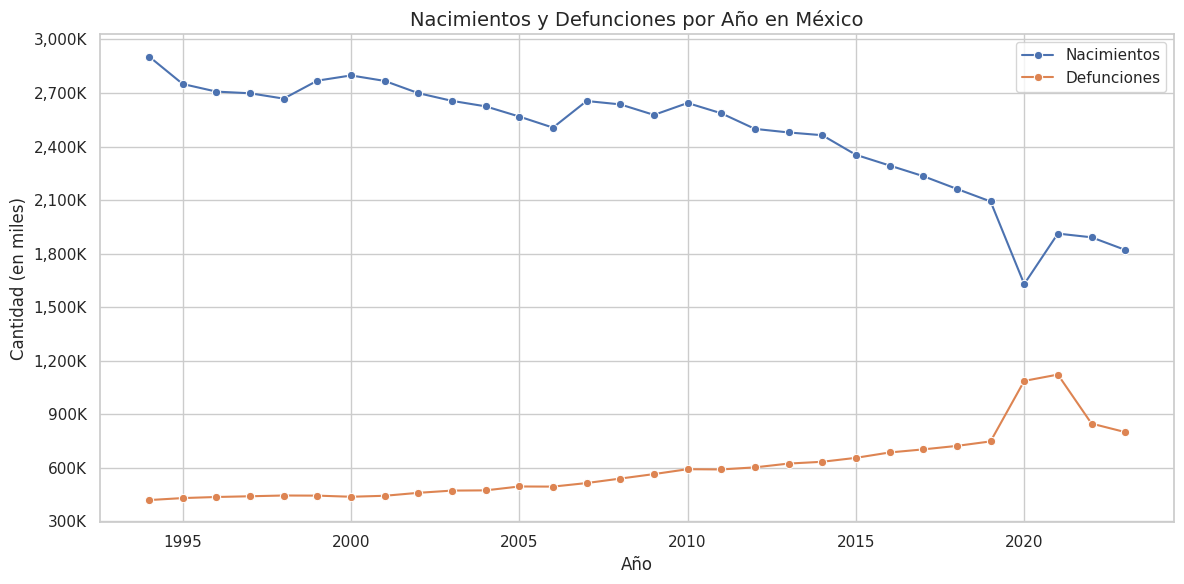

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Cargar datos
df = pd.read_csv('nac_def_mexico.csv')

# Asegurar que 'Periodo' sea numérico y ordenar por año
df['Periodo'] = pd.to_numeric(df['Periodo'], errors='coerce')
df = df.sort_values('Periodo')

# Convert 'Nacimientos' and 'Defunciones' to numeric, handling potential errors
df['Nacimientos'] = pd.to_numeric(df['Nacimientos'].str.replace(',', ''), errors='coerce')
df['Defunciones'] = pd.to_numeric(df['Defunciones'].str.replace(',', ''), errors='coerce')


# Estilo visual
sns.set(style='whitegrid')

# Crear la figura
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Periodo', y='Nacimientos', label='Nacimientos', marker='o')
sns.lineplot(data=df, x='Periodo', y='Defunciones', label='Defunciones', marker='o')

# Títulos y etiquetas
plt.title('Nacimientos y Defunciones por Año en México', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad (en miles)', fontsize=12)

# Eje Y: formatear a miles (K)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e3:,.0f}K'))

# Calcular el rango dinámico y usar 4–6 divisiones como guía
min_y = df[['Nacimientos', 'Defunciones']].min().min()
max_y = df[['Nacimientos', 'Defunciones']].max().max()

# Elegir un múltiplo conveniente, como 250,000
step = 300_000
start = (min_y // step) * step
end = ((max_y // step) + 1) * step

# Establecer los ticks en el rango deseado
plt.yticks(range(int(start), int(end) + step, step))

# Leyenda y ajustes finales
plt.legend()
plt.tight_layout()
plt.show()